In [1]:
from nltk.metrics.scores import recall, precision
import json
from os import listdir as l
from rank_bm25 import BM25Okapi, BM25Plus, BM25L

In [4]:
# "../Query_doc.json" has the query and the doc_id of the relevant documents
with open("../Query_doc.json") as f:
    query = json.load(f)
print(query["AILA_Q17"][:10]) # printing first 10 tokens from a random query

['fact', 'matter', 'evid', 'present', 'writ', 'petit', 'challeng', 'order', 'detent', 'date']


In [7]:
with open("cases.json") as f:
    prior_cases = json.load(f)
print(prior_cases["C69"][:10]) # printing first 10 tokens from the first case

['union', 'of', 'india', 'and', 'other', 'v', 'sushil', 'kumar', 'modi', 'and']


In [24]:
with open("answers.json") as f:
    answers = json.load(f)
print(answers["AILA_Q1"]) # printing first 10 tokens from the first case

['C168', 'C14', 'C9']


In [6]:
query.keys()

dict_keys(['AILA_Q1', 'AILA_Q2', 'AILA_Q3', 'AILA_Q4', 'AILA_Q5', 'AILA_Q6', 'AILA_Q7', 'AILA_Q8', 'AILA_Q9', 'AILA_Q10', 'AILA_Q11', 'AILA_Q12', 'AILA_Q13', 'AILA_Q14', 'AILA_Q15', 'AILA_Q16', 'AILA_Q17', 'AILA_Q18', 'AILA_Q19', 'AILA_Q20', 'AILA_Q21', 'AILA_Q22', 'AILA_Q23', 'AILA_Q24', 'AILA_Q25', 'AILA_Q26', 'AILA_Q27', 'AILA_Q28', 'AILA_Q29', 'AILA_Q30', 'AILA_Q31', 'AILA_Q32', 'AILA_Q33', 'AILA_Q34', 'AILA_Q35', 'AILA_Q36', 'AILA_Q37', 'AILA_Q38', 'AILA_Q39', 'AILA_Q40', 'AILA_Q41', 'AILA_Q42', 'AILA_Q43', 'AILA_Q44', 'AILA_Q45', 'AILA_Q46', 'AILA_Q47', 'AILA_Q48', 'AILA_Q49', 'AILA_Q50'])

In [7]:
prior_cases.keys()

dict_keys(['C1', 'C10', 'C100', 'C101', 'C102', 'C103', 'C1033', 'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'C11', 'C110', 'C111', 'C112', 'C113', 'C114', 'C115', 'C116', 'C117', 'C118', 'C119', 'C12', 'C120', 'C121', 'C122', 'C1225', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128', 'C129', 'C13', 'C130', 'C131', 'C132', 'C1326', 'C133', 'C134', 'C135', 'C136', 'C137', 'C1377', 'C138', 'C139', 'C1399', 'C14', 'C140', 'C1409', 'C141', 'C142', 'C143', 'C144', 'C1441', 'C145', 'C1457', 'C146', 'C147', 'C148', 'C149', 'C15', 'C150', 'C151', 'C152', 'C153', 'C154', 'C155', 'C156', 'C157', 'C158', 'C159', 'C16', 'C160', 'C161', 'C162', 'C163', 'C1631', 'C164', 'C165', 'C166', 'C167', 'C168', 'C169', 'C17', 'C170', 'C1700', 'C171', 'C172', 'C173', 'C1733', 'C174', 'C175', 'C176', 'C177', 'C1770', 'C178', 'C179', 'C18', 'C180', 'C181', 'C182', 'C183', 'C184', 'C185', 'C1855', 'C186', 'C1868', 'C187', 'C188', 'C1893', 'C1897', 'C19', 'C1965', 'C2', 'C20', 'C2046', 'C2099', 'C21', 'C2117', '

In [8]:
answers

{'AILA_Q1': ['C168', 'C14', 'C9'],
 'AILA_Q2': ['C2046', 'C27', 'C22'],
 'AILA_Q3': ['C2642', 'C1'],
 'AILA_Q4': ['C1855', 'C182'],
 'AILA_Q5': ['C438', 'C54', 'C36', 'C155', 'C144', 'C121'],
 'AILA_Q6': ['C2507', 'C152', 'C26', 'C19', 'C99'],
 'AILA_Q7': ['C802', 'C130'],
 'AILA_Q8': ['C1868', 'C32', 'C125', 'C60'],
 'AILA_Q9': ['C2784', 'C42', 'C90'],
 'AILA_Q10': ['C881', 'C185', 'C180', 'C86'],
 'AILA_Q11': ['C2733', 'C131', 'C132'],
 'AILA_Q12': ['C1700', 'C8'],
 'AILA_Q13': ['C713', 'C102', 'C120', 'C40'],
 'AILA_Q14': ['C364', 'C46'],
 'AILA_Q15': ['C1409', 'C185'],
 'AILA_Q16': ['C2797', 'C166', 'C50'],
 'AILA_Q17': ['C2304', 'C67', 'C23', 'C145'],
 'AILA_Q18': ['C151', 'C188'],
 'AILA_Q19': ['C2520', 'C63', 'C89', 'C77', 'C142'],
 'AILA_Q20': ['C2800', 'C134', 'C168'],
 'AILA_Q21': ['C887', 'C48', 'C28', 'C114', 'C113'],
 'AILA_Q22': ['C2099', 'C11', 'C118'],
 'AILA_Q23': ['C1965', 'C88', 'C10'],
 'AILA_Q24': ['C2585', 'C171'],
 'AILA_Q25': ['C973', 'C29', 'C15', 'C41', 'C105'

In [9]:
# prediction = {}
# for new_case in query.keys():
#     predicted_cases = {}
#     for prior_case in prior_cases.keys():
#         predicted_cases[prior_case] = Jaccard_Coefficient(query[new_case], prior_cases[prior_case])
#     prediction[new_case] = predicted_cases
#     print(new_case, prediction[new_case])

# with open("Jaccard_Scores.json", "w") as f:
#     json.dump(prediction, f)

In [10]:
with open("Jaccard_Scores.json") as f:
	scores = json.load(f)

In [11]:
def predict(threshold, scores):
    ret = {}
    for query in scores.keys(): # "AILA_Qx"
        a = [case for case in scores[query].keys() if scores[query][case]>=threshold]
        # for case in scores[query].keys(): # "Cx"
        #     if scores[query][case]>threshold:
        #         a.append(case)
        ret[query] = a
    return ret

prediction = predict(6.5, scores)

In [12]:
# # Code for loading predictions
# l = [i for i in l() if i.startswith("prediction_")]
# if f"prediction_{threshold}.json" in l:
#     with open(f"prediction_{threshold}.json") as f:
#         prediction = json.load(f)
# else:
#     for i in range(len(l)):
#         print(i, "-", l[i])
#     index = int(input("Enter the index of the file: "))
#     with open(l[index]) as f:
#         prediction = json.load(f)

In [13]:
for i in range(50): print(prediction[list(prediction.keys())[i]])

['C114', 'C116', 'C118', 'C1225', 'C1399', 'C1441', 'C15', 'C150', 'C158', 'C160', 'C165', 'C1733', 'C176', 'C2304', 'C2585', 'C262', 'C27', 'C29', 'C369', 'C404', 'C44', 'C49', 'C65', 'C67', 'C694', 'C713', 'C76', 'C81', 'C82', 'C9', 'C92', 'C93']
['C2304', 'C2585', 'C369', 'C53']
['C369']
['C112', 'C148', 'C2585', 'C65', 'C92']
['C118', 'C1225', 'C1326', 'C138', 'C1441', 'C1700', 'C184', 'C1965', 'C2117', 'C2304', 'C2520', 'C2585', 'C2797', 'C31', 'C369', 'C404', 'C46', 'C53', 'C713', 'C74']
[]
['C369']
['C118', 'C1225', 'C1441', 'C148', 'C2117', 'C2304', 'C2585', 'C2797', 'C31', 'C404', 'C46', 'C713', 'C74']
['C107', 'C118', 'C122', 'C1225', 'C1326', 'C1399', 'C1441', 'C148', 'C1965', 'C2117', 'C2304', 'C2797', 'C404', 'C46', 'C713', 'C74', 'C76']
['C118', 'C122', 'C1965', 'C2304', 'C31', 'C369', 'C404', 'C713']
['C114', 'C116', 'C145', 'C15', 'C158', 'C161', 'C175', 'C2585', 'C262', 'C45', 'C49', 'C67', 'C76', 'C8', 'C85', 'C91']
[]
['C114', 'C369', 'C76', 'C92']
['C118', 'C122', '

In [14]:
# *2 because we know there are 50 queries, hence scaling it to 100
sum([precision(set(answers[i]), set(prediction[i])) for i in prediction.keys() if len(prediction[i])])*2

6.051246939306523

In [15]:
sum([recall(set(answers[i]), set(prediction[i])) for i in prediction.keys() if len(prediction[i])])*2

11.918869053651662

In [16]:
meanAP(answers, prediction)

0.08027106770948786

In [17]:
# finding the best value for threshold by regression
alpha = 0.1
# prediction = predict(5, scores)

def slope(threshold):
    u = meanAP(answers, predict(threshold+0.01, scores))
    l = meanAP(answers, predict(threshold-0.01, scores))
    return (u-l)/(0.02)

threshold = 5.1
for i in range(100):
    # print(threshold, slope(threshold))
    threshold += alpha*slope(threshold)

threshold

5.148322151349134

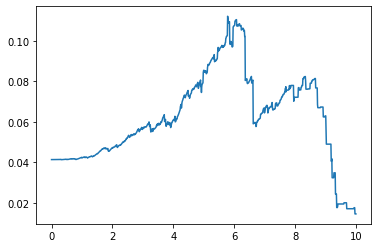

In [35]:
import matplotlib.pyplot as plt
import numpy as np

MeanAP = np.vectorize(meanAP)
Predict = np.vectorize(predict)

X = np.arange(0, 10, 0.01)
Y = MeanAP(answers, Predict(X, scores))

plt.plot(X, Y)
plt.show()

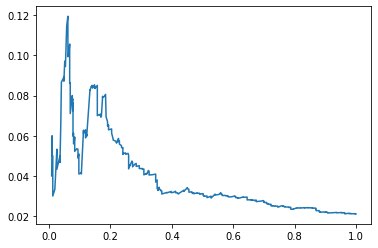

In [36]:

X1 = []
Y1 = []
for i in X:
    b = predict(i, scores)
    X1.append(sum([recall(set(answers[i]), set(b[i])) for i in b.keys() if len(b[i])])/50)
    Y1.append(sum([precision(set(answers[i]), set(b[i])) for i in b.keys() if len(b[i])])/50)

plt.plot(X1, Y1)

In [ ]:
meanAP(answers, predict(5.8, scores))

0.10881175727197012